Welcome to Computer Vision! In this homework we will cover image access manipulation, image filtering, and edge detection topics.


---


Few instructions to keep in mind before you start:


1.   The assignments are slightly challenging yet they will be graded leniently. Hence, please attempt them on your own.
2. The use of AI for all assignment is allowed per the course polices. However, make sure that you understand what is going on as AI is prohibited for other assessements.
3. There are multiple vision libraries available in python (cv2, Pillow, PIL, etc..). The use of cv2 is recommended but there are no restrictions on that. Make sure to check the color format followed in the library you use (Ex. cv2 --> BGR).
2. Some questions are formulated in a way that eliminates the possibilty of replicated answers. *Cheating will not be tolerated.*
4. Please submit your answer as a notebook (.ipynb) along with any additional files in a zip file. Failure to do so will be penalized.
5. Each assignment is worth 5% of your final grade but will be graded out of 100 to leave larger space for partial grades.
6. For inquires about the homework please send an email to asajun@aus.edu


Finally, have fun... ( ﾉ ﾟｰﾟ)ﾉ


---



**Q.1. Beyond What You See.** ( /35)


---


All related files to this question are found under Q1 folder.

**1.1.**  In the August of 1999, Japan decided to re-design its flag. The circle color was changed from #B0313F color to #BC002D color. The Japanese flag before these "significant" changes is provided to you in Q1 Folder.  Your task is to apply the neccessary changes and show the flag before and after it was redesigned. [ /10]



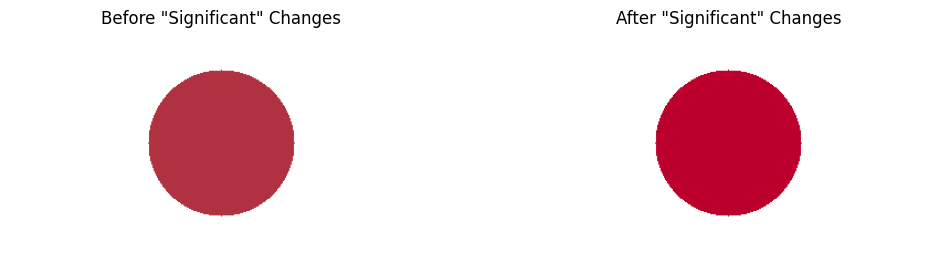

In [18]:
#Solution
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2 (BGR format)
image = cv2.imread('Q1/japan_flag.png')

# Convert the image to RGB to plot it
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the original image
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Before "Significant" Changes')
plt.axis('off')

# Change the values of the pixels
output = image.copy()
for x in range(0,output.shape[0]):
    for y in range(0,output.shape[1]):
        if((output[x,y,:]==[176,49,63]).all()):
            output[x,y,:]=[188,0,45]

# Plot the modified image
plt.subplot(1,2,2)
plt.imshow(output)
plt.title('After "Significant" Changes')
plt.axis('off')
plt.show()

**1.2.** After hearing that Aokigahara Forest in Japan is a weird place, your curiosity pushes you into googling how it looks like. However, the image that you find (forest.jpg) seems too fascinating to be true. Find the issue in this image and fix it. [ /10]

<a href="https://ibb.co/3dXJmbX"><img src="https://i.ibb.co/mTsx5Ks/forest.jpg" alt="forest" border="0"></a>

(-0.5, 999.5, 666.5, -0.5)

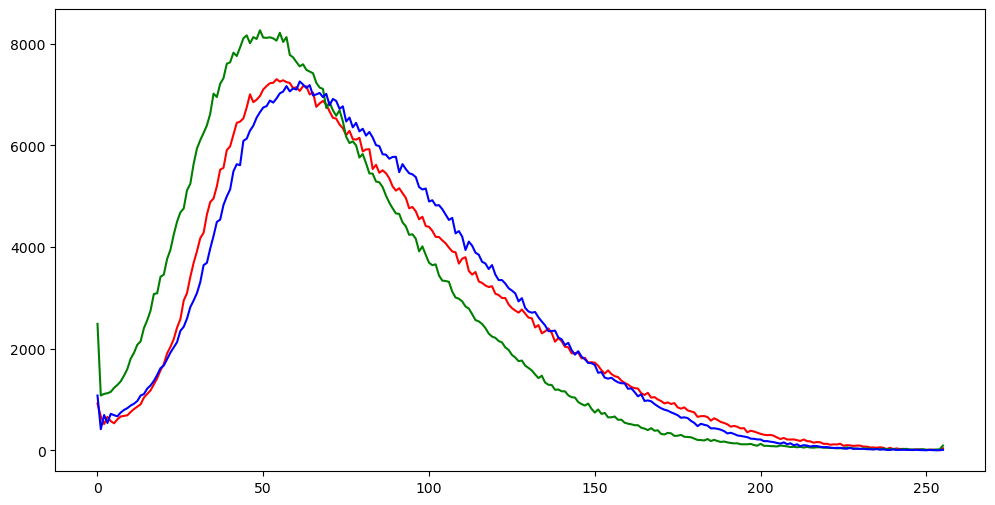

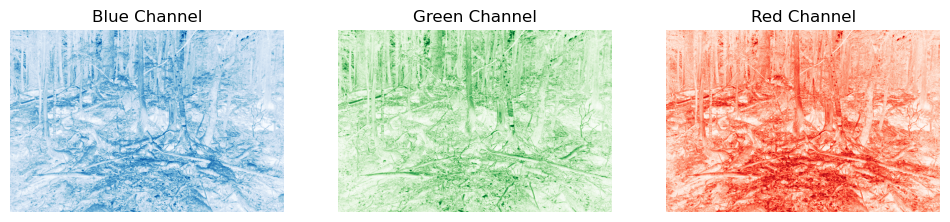

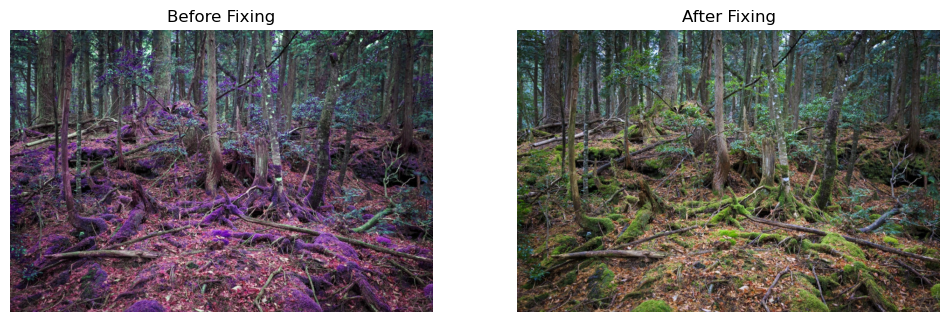

In [3]:
#Solution
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2 (BGR format)
image = cv2.imread('Q1/forest.jpg')

# Convert the image to RGB to plot it
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

histSize = 256
color = ('r','g','b')
plt.figure(figsize=(12, 6))
for i,col in enumerate(color):
    #histr = np.histogram(balanced_image_float[:,:,i], np.arange(0,256,1))[0]
    histr = cv2.calcHist([image],[i],None,[histSize],[0,256])
    plt.plot(histr, color = col)
    #plt.bar(range(histSize), histr.flatten(), width=1.0, color=col)
    #plt.xlim([0,histSize])

# Split the RGB channels
r,g,b = cv2.split(image)
plt.figure(figsize=(12, 6))

# Display the Blue channel
plt.subplot(131)
plt.imshow(b, cmap = 'Blues')
plt.title('Blue Channel')
plt.axis('off')

# Display the Green channel
plt.subplot(132)
plt.imshow(g, cmap = 'Greens')
plt.title('Green Channel')
plt.axis('off')

# Display the Red channel
plt.subplot(133)
plt.imshow(r, cmap = 'Reds')
plt.title('Red Channel')
plt.axis('off')

# Merge the channels correctly
output = cv2.merge([r,b,g])

# Plot the original and modified image
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(image)
plt.title('Before Fixing')
plt.axis('off')
plt.subplot(122)
plt.imshow(output)
plt.title('After Fixing')
plt.axis('off')

**1.3.** Vision data can extend beyond the visible RGB spectrum. While using google earth, you notice an area below the deadsea between Jordan and Palestine (Map_RGB.tiff) in which you are not sure whether it is a waterbody, a cropland, or a mountain. Our good friends at Sentinel satellites provide you with a Near-Infrared (NIR) image of the same map (Map_NIR.tiff) to help you identify the nature of that area. Use the provided images to draw a conclusion about this area (cmap: "Paired") and discuss your results. [/15]

<a href="https://ibb.co/LN5Qb60"><img src="https://i.ibb.co/NTS1QpF/pic.png" alt="pic" border="0"></a>



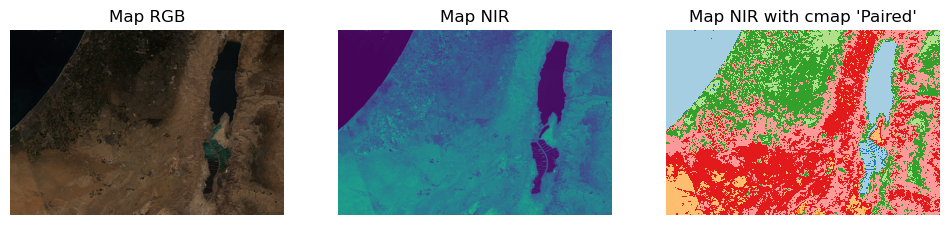

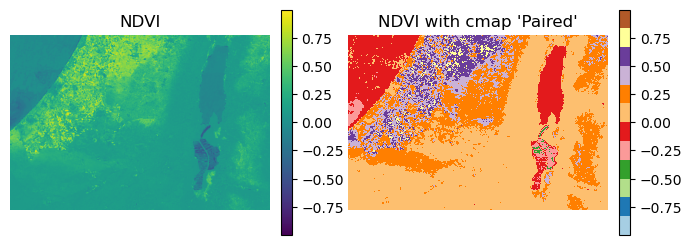

In [45]:
#Solution
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2 (BGR format)
image_RGB = cv2.imread('Q1/Map_RGB.tiff')

# Convert the image to RGB to plot it
image_RGB = cv2.cvtColor(image_RGB, cv2.COLOR_BGR2RGB)

# Get the Red channel and convert it to float
R, _, _= cv2.split(image_RGB)
R = R.astype(np.float64)

# Plot the original image
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(image_RGB)
plt.title('Map RGB')
plt.axis('off')

# Read the image using cv2 (BGR format)
image_NIR = cv2.imread('Q1/Map_NIR.tiff')

# Convert the image to grayscale
image_NIR = cv2.cvtColor(image_NIR,cv2.COLOR_BGR2GRAY)

# Plot the NIR image
plt.subplot(1,3,2)
plt.imshow(image_NIR)
plt.title('Map NIR')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(image_NIR, cmap = 'Paired')
plt.title('Map NIR with cmap \'Paired\'')
plt.axis('off')

# Calculate NDVI and plot it
NIR = image_NIR.astype(np.float64)
NDVI = (NIR-R)/(NIR+R+0.0000001)
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
plt.imshow(NDVI)
plt.colorbar(fraction=0.04, pad=0.04)
plt.title('NDVI')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(NDVI, cmap = 'Paired')
plt.colorbar(fraction=0.04, pad=0.04)
plt.title('NDVI with cmap \'Paired\'')
plt.axis('off')
plt.show()

**ANS:** In the NDVI image, we can see that the area has a low NDVI value, showing that it is not vegetation, which eliminates the possibility of cropland. After applying cmap = 'Paired', we can see that the dead sea actually has an NDVI value between 0 and -0.25, which is the red color. Seeing that the unknown area is the same color, we can conclude that the area is a waterbody.



---


**Q.2. Can you help out?** (/40)


---


All related files to this question is available in Q.2. Folder.

**2.1.** This question has three short answer sub-parts (/10)

**2.1.1** Explain breifly the difference between cross-correlation and convolution. (/2)

**ANS:**
Both are essential operations for tasks like image processing. Cross-correlation is filtering with an upright kernel while convolution is filtering with a flipped kernel. The flipped kernel would be flipped in both X and Y. 

**2.2.2** What happens when a kernel is applied to an image without padding? (/2)

**ANS:**
Without padding, the edges of the image would not be taken into consideration as the kernel is applied. As a result, there could be a reduction in the dimensions of the output.

**2.2.2** Apply two padding techinques on an image of your choice. show a clear padded images along with the original image (/6)

(-0.5, 1747.5, 1799.5, -0.5)

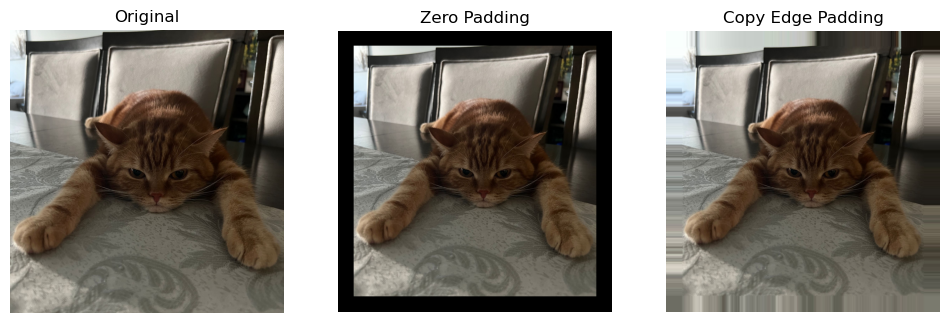

In [30]:
# I'm using a picture of Leo (one of my cats) :))
# Techniques: zero padding and copy edge 

# Read the image and convert to RGB
image = cv2.imread('Q2/leo.jpg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

# Set the size of the padding
up, down, left, right = 100, 100, 100, 100

# Apply zero padding technique
zero_padding = cv2.copyMakeBorder(image, up, down, left, right, borderType=cv2.BORDER_CONSTANT)

# Apply copy edge padding
copy_edge = cv2.copyMakeBorder(image, up, down, left, right, cv2.BORDER_REPLICATE)

# Plot the original image and the padded images
plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
plt.imshow(image)
plt.title('Original')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(zero_padding)
plt.title('Zero Padding')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(copy_edge)
plt.title('Copy Edge Padding')
plt.axis('off')

2.2. The Shawshank Redemption is my favorite movie. However, my TV is too old now and I cannot see things clearly. Can you fix my TV? I left a frame of the movie for you to have a look (shawshank.png). (/10)

<a href="https://ibb.co/k15HCXQ"><img src="https://i.ibb.co/M6Z207M/shawshank.png" alt="shawshank" border="0"></a><br /><a target='_blank' href='https://ar.imgbb.com/'></a>

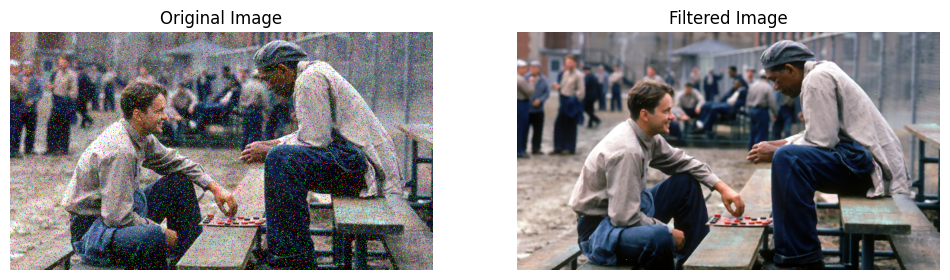

In [4]:
#Solution
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2 (BGR format)
image= cv2.imread('Q2/shawshank.png')

# Convert the image to RGB to plot it
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Apply Median Filtering and plot the image
median_filtered_image = cv2.medianBlur(image, ksize=3)
plt.subplot(1,2,2,)
plt.imshow(median_filtered_image)
plt.title('Filtered Image')
plt.axis('off')
plt.show()

**2.3.** This TV channel made a horrible mistake (TV.jpg). Could you help them out and fix it? Use box and gaussian filters and compare. (/10)

<a href="https://imgbb.com/"><img src="https://i.ibb.co/J5zJ75c/TV.jpg" alt="TV" border="0"></a>


(-0.5, 397.5, 603.5, -0.5)

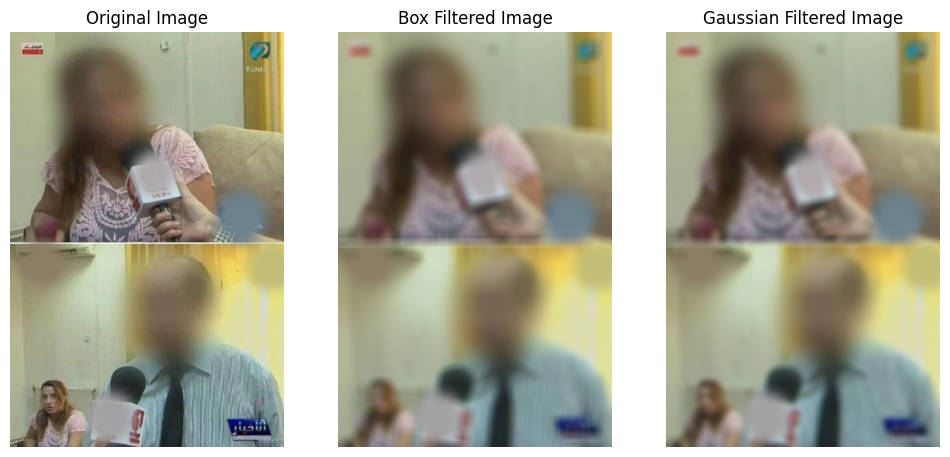

In [6]:
#Solution
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2 (BGR format)
image= cv2.imread('Q2/TV.jpg')

# Convert the image to RGB to plot it
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image_box = image.copy()
image_gaussian = image.copy()

# Blur the image of the woman
image_box = cv2.boxFilter(image, -1, ksize=(15, 15), borderType=cv2.BORDER_REPLICATE)
image_gaussian = cv2.GaussianBlur(image, ksize=(15, 15), sigmaX = 5, sigmaY = 5, borderType=cv2.BORDER_REPLICATE)

# Display the original and filtered images
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(image_box)
plt.title('Box Filtered Image')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(image_gaussian)
plt.title('Gaussian Filtered Image')
plt.axis('off')

**ANS:**
Both types of filters were able to fix the mistake of not blurring the woman's face. However, as we can see when comparing the new blurred images, Gaussian results in a smoother image.

**2.4.** MNIST is a hand-written digits dataset. Sharpen the image obtained above by applying an appropriate kernel and show your results. The variable name of your image is called (img). [ /10]

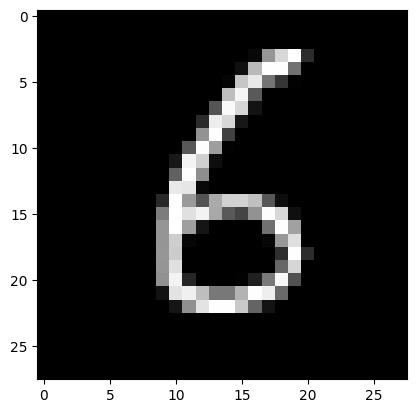

In [7]:
# @title Run the following cell
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist
(train_images, _), (_, _) = mnist.load_data()

id = input("Please Enter your 5/6 digits AUS ID : ")


if len(id) < 5 or id.isdigit() == False:
    print("Please enter a valid AUS ID!")
else:
  img = train_images[(int(id) % len(train_images) - 1)]

  plt.imshow(img, cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


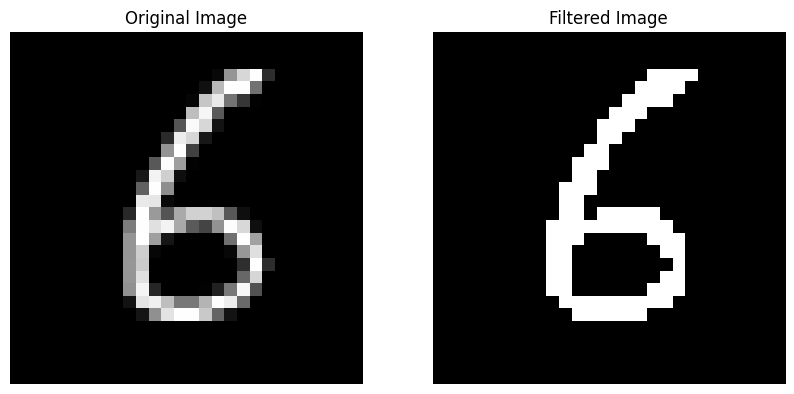

In [19]:
# Solution
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Define the kernel
f =  2 * np.array([[-1,0,-1],
                     [-1,10,-1],
                     [-1,0,-1]])

# Apply the kernel using convolution and plot the image
output = cv2.filter2D(src=img, ddepth=cv2.CV_32F, kernel=f, borderType=cv2.BORDER_CONSTANT)
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(output,cv2.COLOR_BGR2RGB))
plt.title('Filtered Image')
plt.axis('off')
plt.show()



---
**Q.3. On the edge** (/25)


---



**3.1.** Sign Language is a famous computer vision task. However, it needs a camera with a very high resolution to read images properly. Unfortunatly, with the background noise this task becomes very hard. Recent studies showed that the use of edge detectors can help solve this issue. Examine the sobel x and y derivatives and compare them to canny edge detector on the (hand.jpg) image provided. The background has been removed for simplicity. (/15)

(Text(0.5, 1.0, 'Canny Edges'), (-0.5, 314.5, 383.5, -0.5))

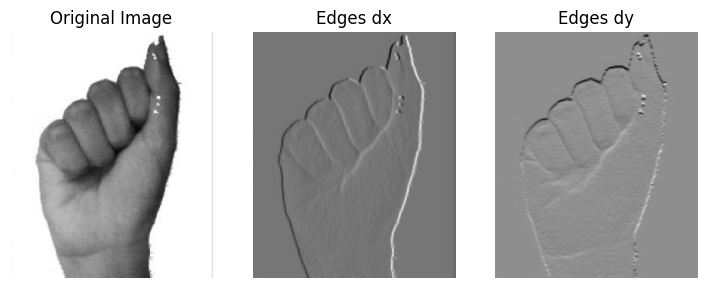

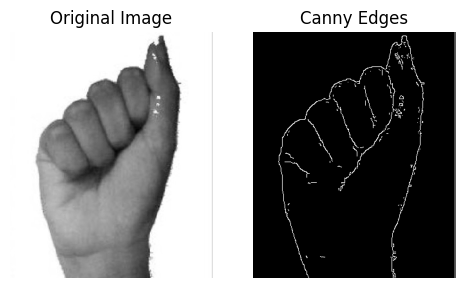

In [12]:
#Solution
import requests
import cv2
from matplotlib import pyplot as plt 
import numpy as np

# Read the image using cv2 (BGR format)
image= cv2.imread('Q3/hand.jpg', cv2.IMREAD_GRAYSCALE)

sobelx = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=5) # Sobel Edge Detection on the X axis
sobely = cv2.Sobel(src=image, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=5) # Sobel Edge Detection on the Y axis

# Display the original image and the edges side by side
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(sobelx, cmap='gray')
plt.title('Edges dx'), plt.axis('off')
plt.subplot(143), plt.imshow(sobely, cmap='gray')
plt.title('Edges dy'), plt.axis('off')

edges = cv2.Canny(image, 80, 100)

# Display the original image and the edges side by side
plt.figure(figsize=(12, 10))
plt.subplot(141), plt.imshow(image, cmap='gray')
plt.title('Original Image'), plt.axis('off')
plt.subplot(142), plt.imshow(edges, cmap='gray')
plt.title('Canny Edges'), plt.axis('off')

**ANS:** The Sobel operator is a simpler technique for edge detection than the Canny Edge detector, which incorporates several steps (as described below) to obtain more accurate results. Therefore, the edges using the Canny Edge detector are more precise than the ones obtained using the Sobel operator.

**3.2.** Explain the working steps of a Canny Edge detector. Indicate the purpose of each step when applicable (/10)

**ANS:**
1. Smooth image: this step allows us to reduce the noise in the image since we only care about the real edges present within the image and not the noise. The noise can be removed using a Gaussian filter. By removing the noise, we're making sure that the edge detection process is more accurate.

2. Calculate the gradient direction and magnitude: this step allows us to analyze the rapid increase in intensity in terms of magnitude as well as the direction in which the intensity changes the most. For this step, we use the Sobel operator to detect the horizontal changes in intensity (Sobel Edge Detection on the X-axis) and the vertical changes in intensity (Sobel Edge Detection on the Y-axis). Using these gradients, you can then calculate the gradient magnitude as sqrt(sobelx^2 + sobely^2) and the direction as arctan(sobely/sobelx).

3. Non-maximum suppression perpendicular to the edge: we need only to keep the edge pixels and suppress the rest, resulting in a thin edge. In this step, we compare each pixel's gradient magnitude with its neighbors in the gradient direction. If it's not the maximum among its neighbors, it's set to zero. 

4. Threshold into strong, weak, no edge: by doing so, we can identify the edge pixels as needed. We have a low and high threshold. If a pixel's magnitude is above the high threshold, it is classified as a strong edge. If it's in between both thresholds, it's classified as a weak edge. If it's lower than the low threshold, it is not considered an edge. 
    
5. Connect together components: in this step, we determine whether or not to keep the weak edges based on their connectivity to strong edges. If they're not connected to a strong edge, they are discarded. The algorithm continues to find the connected edges until we have a continuous edge contour for the image. 